
# 1. Introduction

This study has been developed for the purposes of the EMPIR project “Metrology for the Factory of the Future” (Met4FoF) -  Activity A1.2.2 of the Work Package 1.Two laboratories in PTB and CEM posses conventional dynamic calibration set-ups for acceleration sensors under test. This section describes different methods for the interlaboratory study on the comparison of measurement results of digital - output acceleration sensor (DUT). The study covered two laboratories with their individual set-ups.  Among in-detailed analysis of the data, three case studies (according to GUM, GUM-S1 and weighted values) were applied as the inputs for the one method of comparison - En values calculation.  The second method of comparison relies on the weighted difference. The analysis required data transformation from time domain signals to the frequency domain, sine approximation and Gaussian error propagation. The selected sensor for acceleration measurements is a three-axial low-g acceleration sensor with digital output, which allows measurements of acceleration in three perpendicular axes. Only an X-axis acceleration was observed during the study. 

## 1.1. State of the art

In conventional dynamic calibration procedures for acceleration sensors, the acceleration used for the sensor input is applied either as **a sinusoidal excitation with a given frequency and amplitude** or as **a singular shock-like excitation characterized by pulse width and intensity**. 
<br>The quantity is then measured by a reference sensor and by the device under test (DUT). The results of DUT are compared to the reference and hence characterized and linked to the SI. In a dynamic calibration situation, the response of the DUT to time-varying input is the major interest. Hence, it is crucial that the mechanical input operates simultaneously and equally on the reference and DUT. Both, the reference and the DUT provide **electrical outputs (typical voltage)** while **the data acquisition electronics** of the system provides **the analogue to digital conversion (ADC).**
In order to connect the reference and the DUT to the ADC system, two analogue channels are needed. In order to get reliable information on the time dependent response, the timing of the data acquisition on the two channels has to be synchronized. This is typically accomplished by provision of a common clock signal to drive the sampling units of the ADC and a common trigger to start (or mark) the beginning of the acquisition. 

## 1.2. The extension of conventional dynamic calibration systems to digital-output sensors 

In a set-up where the DUT is a digital-output sensor,the sampling of the DUT time series is no longer under the control (trigger, clock) of the calibration system. Instead, the DUT comprises its own digitizer unit with a time base independent of the calibration system. In fact, a typical conventional calibration set-up does not provide an input for digital data at all.
The solution to this problem requires two extensions:
1.	A digital acquisition unit (DAU) which is capable to connect to the digital interface of the sensor under calibration and store/transmit the DUT time-series for later analysis
2.	An additional synchronization signal that provides the link between the time-base of the calibration system and the time-base of the DUT.

The concept for the extension of existing facilities for dynamic calibration uses a custom digital acquisition unit microcontroller board with a connected reference time signal for traceable time stamping of acquired data points. This allows for a synchronised data acquisition from the reference measurement and the DUT. 


The selected laboratories posses their set-ups and the calibration items were calibrated in both set-ups.The analysis required transformation from time domain to the frequency domain, where frequencies and corresponding magnitudes and phases were calculated.The measurement conditions were kept according to the laboratory standard conditions. 

Each laboratory submitted HDFT files containing groups:
- EXPERIMENTS - containing 171 files (experiment) corresponding to the sine excitations
- RAWDATA - where data from ADCs (*voltage, absolute time, absolute time uncertainty*)  and sensors (*absolute time, absolute time uncertainty, acceleration, angular velocity, magnetic flux density and temperature*) can be approached during the measurements
- RAWTRANSFERFUNCTION - *this group contains quantities of interest: frequencies, amplitudes, assigned uncertainties of amplitudes, phases,  assigned uncertainties of phases, excitation amplitudes and assigned uncertainties of excitation amplitudes
- REFERENCEDATA - reference data from ADCs and sensors.

Measurement characteristics of DUT are given in the Table 1 below
    
| <b>PTB<b> | Sensor | Internal ADC |
| --- | --- | --- |
| <b>Name<b> | MPU 9250| STM 32 Internal ADC |
| <b>ID<b>  | 535035904 | 535038464 |
| <b>Quantity<b>  | X Acceleration | Voltage  @CH1 |
| <b>Unit<b>  | $\frac{m}{s^{2}}$ | V |    
| <b>Resolution<b>  | 65536,0 (16-bit) | 4096,0 (12-bit) |
| <b>Min. scale<b>  | -156,91439819335938 $\frac{m}{s^{2}}$  | -10 V |
| <b>Max. scale<b>  | 156,90960693359375 $\frac{m}{s^{2}}$  | 10 V |
    
| <b>CEM<b> | Sensor | Internal ADC |
| --- | --- | --- |
| <b>Name<b> | MPU 9250| STM 32 Internal ADC |
| <b>ID<b>  | 3167420416 | 31674422976 |
| <b>Quantity<b>  | X Acceleration | Voltage  @CH1 |
| <b>Unit<b>  | $\frac{m}{s^{2}}$ | V |    
| <b>Resolution<b>  | 65536,0 (16-bit) | 4096,0 (12-bit) |
| <b>Min. scale<b>  | -156,91439819335938 $\frac{m}{s^{2}}$  | -10 V |
| <b>Max. scale<b>  | 156,90960693359375 $\frac{m}{s^{2}}$  | 10 V |
    
    
The calibration range of the study was selected in accordance with the current measurement capabilities of the participating laboratories. The study consisted of ten measurement cycles for PTB and nine measurement cycles for CEM in the frequency range of (10.0 - 250.0)Hz. Each measurement cycle contained seventeen calibration points within the selected frequency range. The individual measurements in the one cycle are called “experiments”. Each calibration point in one cycle was quantified in terms of estimated values and standard deviations of magnitude and phase.  These values arose from the sine-fitting and conversion
of time-domain signals into frequency domain. The provided data sets also include the excitation amplitude values, whose variations from the targeted values are known and not considered.  The CEM’s set-up always starts measurement at frequencies of80.0 Hz and 250.0 Hz respectively, before targeting the calibration point at 10.0Hz. In particular, the magnitude and phase values originating from this characteristic of the CEM’s set-up have not been considered.The measurement conditions were kept according to the laboratory standard conditions.

In [4]:
import h5py
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import scipy.stats as stats
import seaborn as sns

#conda install -c conda-forge miktex in command prompt
import seaborn as sns
#from ipywidgets import widgets, Layout-this is optionally, must be installed 
#from IPython import display - this is optionally
#from ipywidgets import widgets, Layout


In [5]:
#FOR LATEX - takes longer to run plots
#plt.rc('font', family='serif')
#plt.rc('text', usetex=True)
#plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
#PLTSCALFACTOR =2
#SMALL_SIZE = 8 * PLTSCALFACTOR
#MEDIUM_SIZE =9 * PLTSCALFACTOR
#BIGGER_SIZE = 11 * PLTSCALFACTOR

#plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
#plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
#plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
#plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
#plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
#plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
#plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

# 2.Extract the data

Data for ILC comparison is extracted from the HDF5 files separately for PTB and CEM. The extracted data will be sorted by frequency at the end of the Notebook and saved into Excel file.

In [6]:
def extract_data(filename, sensor_index):
    #explore the HDF5 file, folders and subfolders
    with h5py.File(filename,'r') as f:
        base_items=list(f.items())
        print("\nItems in directory", base_items)
        rawtransfer=f.get("RAWTRANSFERFUNCTION")
        rawtransfer_items=list(rawtransfer.items())
        print("\nItems in reference", rawtransfer_items)
        subgroup=rawtransfer.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250")
        subgroup_items=list(subgroup.items())
        print("\n"+sensor_index+"_MPU_9250 items:",subgroup_items)
        subgroup_acceleration=subgroup.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration")
        subgroup_acceleration_items=list(subgroup_acceleration.items())
        print("\nAcceleration items:",subgroup_acceleration_items)
        subgroup_acceleration_5mem=subgroup.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration")
        subgroup_acceleration_5mem_items=list(subgroup_acceleration_5mem.items())
        print("\nAcceleration items_5members:", subgroup_acceleration_5mem_items)
        frequency=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration/Excitation_frequency")
        frequency_items=list(frequency.items())
        print("\nFrequency", frequency_items)
        magnitude=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration/Magnitude")
        magnitude_items=list(magnitude.items())
        print("\nMagnitude", magnitude_items)
        phase=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration/Phase")
        phase_items=list(magnitude.items())
        print("\nPhase", phase_items)
        
        
        #extract frequencies, magnitude, phase, uncertainties and all excitation parameters
        frequency_values=np.array(frequency.get("value"))
        magnitude_values=np.array(magnitude.get("value"))
        magnitude_uncertainties=np.array(magnitude.get("uncertainty"))
        phase_values=np.array(phase.get("value"))
        phase_uncertainties=np.array(phase.get("uncertainty"))
        excitation_freq_items=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration/Excitation_frequency")
        excitation_freq=np.array(excitation_freq_items.get("value"))
        excitation_amp_items=subgroup_acceleration_5mem.get("/RAWTRANSFERFUNCTION/"+sensor_index+"_MPU_9250/Acceleration/Acceleration/Excitation_amplitude")
        excitation_amp=np.array(excitation_amp_items.get("value"))
        excitation_amp_uncertainty=np.array(excitation_amp_items.get("uncertainty"))
        
        #join all necessary data in 2D array
        total_array=np.stack((frequency_values,magnitude_values,magnitude_uncertainties,phase_values, phase_uncertainties,excitation_freq,excitation_amp,excitation_amp_uncertainty), axis=1)
        print("\nArray dimensions:", total_array.shape)
        column_names=["Frequency [Hz]", r"$x_{M},$ [m s^-2/m s^-2]",r"$U_{M},$ [m s^-2/m s^-2]", r"$x_{\phi},$ [rad]", r"$U_{\phi},$ [rad]","Excitation_freq [Hz]",r"$x_{Aexcit},$ [m s^-2/m s^-2]",r"$U_{Aexcit},$ [m s^-2/m s^-2]"]
        whole_dataset=pd.DataFrame(total_array, columns=column_names)
        f.close()
        
        
        return whole_dataset

In [7]:
whole_dataset_PTB = extract_data('MPU9250PTB_v5.hdf5',"0x1fe40000")


Items in directory [('EXPERIMENTS', <HDF5 group "/EXPERIMENTS" (1 members)>), ('RAWDATA', <HDF5 group "/RAWDATA" (2 members)>), ('RAWTRANSFERFUNCTION', <HDF5 group "/RAWTRANSFERFUNCTION" (1 members)>), ('REFERENCEDATA', <HDF5 group "/REFERENCEDATA" (2 members)>)]

Items in reference [('0x1fe40000_MPU_9250', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250" (1 members)>)]

0x1fe40000_MPU_9250 items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration" (1 members)>)]

Acceleration items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration/Acceleration" (11 members)>)]

Acceleration items_5members: [('DUT_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration/Acceleration/DUT_Phase" (2 members)>), ('DUT_SNYNC_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/Acceleration/Acceleration/DUT_SNYNC_Phase" (2 members)>), ('DUT_amplitude', <HDF5 group "/RAWTRANSFERFUNCTION/0x1fe40000_MPU_9250/

In [8]:
whole_dataset_PTB.head(2)

,Frequency [Hz],"$x_{M},$ [m s^-2/m s^-2]","$U_{M},$ [m s^-2/m s^-2]","$x_{\phi},$ [rad]","$U_{\phi},$ [rad]",Excitation_freq [Hz],"$x_{Aexcit},$ [m s^-2/m s^-2]","$U_{Aexcit},$ [m s^-2/m s^-2]"
0,10.0,1.019554,0.003273,-0.094684,0.003022,10.0,2.739,0.004891
1,12.5,1.019093,0.004047,-0.118820,0.006455,12.5,2.744,0.007312


Phase data for PTB must be reverted:

In [9]:
whole_dataset_PTB[[r"$x_{\phi},$ [rad]"]] = whole_dataset_PTB[[r"$x_{\phi},$ [rad]"]]
whole_dataset_PTB.head(2)

,Frequency [Hz],"$x_{M},$ [m s^-2/m s^-2]","$U_{M},$ [m s^-2/m s^-2]","$x_{\phi},$ [rad]","$U_{\phi},$ [rad]",Excitation_freq [Hz],"$x_{Aexcit},$ [m s^-2/m s^-2]","$U_{Aexcit},$ [m s^-2/m s^-2]"
0,10.0,1.019554,0.003273,-0.094684,0.003022,10.0,2.739,0.004891
1,12.5,1.019093,0.004047,-0.118820,0.006455,12.5,2.744,0.007312


In [10]:
whole_dataset_CEM = extract_data('MPU9250CEM_v5.hdf5',"0xbccb0000")


Items in directory [('EXPERIMENTS', <HDF5 group "/EXPERIMENTS" (1 members)>), ('RAWDATA', <HDF5 group "/RAWDATA" (2 members)>), ('RAWTRANSFERFUNCTION', <HDF5 group "/RAWTRANSFERFUNCTION" (1 members)>), ('REFERENCEDATA', <HDF5 group "/REFERENCEDATA" (2 members)>)]

Items in reference [('0xbccb0000_MPU_9250', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250" (1 members)>)]

0xbccb0000_MPU_9250 items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration" (1 members)>)]

Acceleration items: [('Acceleration', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration/Acceleration" (11 members)>)]

Acceleration items_5members: [('DUT_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration/Acceleration/DUT_Phase" (2 members)>), ('DUT_SNYNC_Phase', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/Acceleration/Acceleration/DUT_SNYNC_Phase" (2 members)>), ('DUT_amplitude', <HDF5 group "/RAWTRANSFERFUNCTION/0xbccb0000_MPU_9250/

In [11]:
whole_dataset_CEM[[r"$x_{\phi},$ [rad]"]] = whole_dataset_CEM[[r"$x_{\phi},$ [rad]"]]-np.pi
whole_dataset_CEM.head(2)

,Frequency [Hz],"$x_{M},$ [m s^-2/m s^-2]","$U_{M},$ [m s^-2/m s^-2]","$x_{\phi},$ [rad]","$U_{\phi},$ [rad]",Excitation_freq [Hz],"$x_{Aexcit},$ [m s^-2/m s^-2]","$U_{Aexcit},$ [m s^-2/m s^-2]"
0,80.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN
1,250.0,0.643003,0.000891,-2.375412,0.002897,250.0,126.497513,0.125687


Cycles in CEM's dataset start with 80.0 Hz and 250.0 Hz instead of 10.0 Hz. These starting points are deleted in order to compare the cycles in a range from 10.0 Hz and 250.Hz.

In [12]:
delete_rows=[]

for k in range(0,171,19):
    i=k
    j=k+1
    delete_rows.append(i)
    delete_rows.append(j)
whole_dataset_CEM_new=whole_dataset_CEM.drop(axis=0,index=delete_rows)

In [13]:
def split_data_by_frequencies(dataset):
    dict_of_frequencies=dict(iter(dataset.groupby('Frequency [Hz]')))
    return dict_of_frequencies
    #list_of_frequencies=np.array([10,12.5,16,20,25,31.5,40,46.7,50,53.3,63,80,100,125,160,200,250])

In [14]:
#check if all frequencies are the same
PTB_separated_by_freq=split_data_by_frequencies(whole_dataset_PTB)
CEM_separated_by_freq=split_data_by_frequencies(whole_dataset_CEM)
CEM_separated_by_freq_new=split_data_by_frequencies(whole_dataset_CEM_new)
print("Frequencies - PTB:",PTB_separated_by_freq.keys())
print("Frequencies - CEM:",CEM_separated_by_freq.keys())

Frequencies - PTB: dict_keys([10.0, 12.5, 16.0, 20.0, 25.0, 31.5, 40.0, 46.7, 50.0, 53.3, 63.0, 80.0, 100.0, 125.0, 160.0, 200.0, 250.0])
Frequencies - CEM: dict_keys([10.0, 12.5, 16.0, 20.0, 25.0, 31.5, 40.0, 46.7, 50.0, 53.3, 63.0, 80.0, 100.0, 125.0, 160.0, 200.0, 250.0])


In [15]:
PTB_separated_by_freq.get(10).head(1)

,Frequency [Hz],"$x_{M},$ [m s^-2/m s^-2]","$U_{M},$ [m s^-2/m s^-2]","$x_{\phi},$ [rad]","$U_{\phi},$ [rad]",Excitation_freq [Hz],"$x_{Aexcit},$ [m s^-2/m s^-2]","$U_{Aexcit},$ [m s^-2/m s^-2]"
0,10.0,1.019554,0.003273,-0.094684,0.003022,10.0,2.739,0.004891


In [16]:
CEM_separated_by_freq_new.get(10).head(1)

,Frequency [Hz],"$x_{M},$ [m s^-2/m s^-2]","$U_{M},$ [m s^-2/m s^-2]","$x_{\phi},$ [rad]","$U_{\phi},$ [rad]",Excitation_freq [Hz],"$x_{Aexcit},$ [m s^-2/m s^-2]","$U_{Aexcit},$ [m s^-2/m s^-2]"
2,10.0,1.016209,0.004893,-0.094907,0.001665,10.0,2.754331,0.00586


In [17]:
q_names=list(PTB_separated_by_freq.get(10).columns)

In [18]:
list_of_freq=[10,12.5,16,20,25,31.5,40,46.7,50,53.3,63,80,100,125,160,200,250]

# 3. Case study 1: Calculate En values for estimated means and standard deviations (Type A solution)

In the Case study 1, the calculated standard uncertainties of the quantities of interest from different experiments were neglected and it is assumed that they belong to the same distribution.  The estimated mean values for both, magnitude and phase at each frequency are calculated in align with the GUM principle:

## 3.1 The probability distribution

The estimated mean values at each specific frequencies are calculated as:
$${\bar {x}}=\frac {\sum _{i=1}^{n}x_{i}}{n}$$,

where:
<br>x represents the value of an experiment at a specific frequency
<br>n is the number of experiments at a specific frequency.

The observed standard deviation of the single value is *s*, calculated as:
$$s=\sqrt{\frac {\sum _{i=1}^{n}{(x_{i}-\bar {x})}^{2}}{n-1}}$$

Estimated experimental standard deviation to the estimated mean value is:

$$s(\bar {x})=\frac {s}{\sqrt{n}}$$

Note that expanded measurement uncertainty used in this calculation contains only type A information.  

Mean, observed standard deviation and estimated standard deviation to the estimated mean value of all quantities and uncertainties are calculated at every frequency by the function calculate_means_and_std.



In [19]:
def calculate_means_and_std(dictionary,names_mean,names_std,est_names):
    mean_list=[]
    stdev_list=[]
    n_list=[]
    for val in dictionary.values():
        mean_list.append(val.mean())
        stdev_list.append(np.std(val,ddof=1))
        #new part of the code:
        n_list.append(len(val))
    mean_array=np.asarray(mean_list)
    stdev_array=np.asarray(stdev_list)
    n=np.asarray(n_list)
    mean_array=pd.DataFrame(mean_array,columns=names_mean)
    stdev_array=pd.DataFrame(stdev_array,columns=names_std)
    avg_and_std=pd.concat([mean_array,stdev_array],axis=1)
    #new part of the code
    st_dev_estimate=pd.DataFrame(stdev_array.div(np.sqrt(n),axis=0))
    st_dev_estimate.columns=est_names
    st_dev_estimate.rename(columns = {r"$s(\bar{x})$-Frequency [Hz]":"Frequency [Hz]"},inplace=True )
    return avg_and_std, st_dev_estimate


In [20]:

column_names1=["Frequency [Hz]", r"$\bar{x}_{M},$ [m s^-2/m s^-2]",r"$\bar{x}_{U_M},$ [m s^-2/m s^-2]", r"$\bar{x}_{\phi},$ [rad]", r"$\bar{x}_{U_\phi},$ [rad]","Excitation_freq [Hz]",r"$\bar{x}_{Aexcit},$ [m s^-2/m s^-2]",r"$\bar{x}_{U_Aexcit},$ [m s^-2/m s^-2]"]
column_names2=["Frequency [Hz]", r"$s(x_{M}),$ [m s^-2/m s^-2]",r"$s(x_{U_M}),$ [m s^-2/m s^-2]", r"$s(x_{\phi}),$ [rad]", r"$s(x_{U_\phi}),$ [rad]","Excitation_freq [Hz]",r"$s(x_{Aexcit}),$ [m s^-2/m s^-2]",r"$s(x_{U_Aexcit}),$ [m s^-2/m s^-2]"]
column_names3=["Frequency [Hz]", r"$s(\bar{x}_{M}),$ [m s^-2/m s^-2]",r"$\bar{x}_{U_M},$ [m s^-2/m s^-2]", r"$s(\bar{x}_{\phi}),$ [rad]", r"$\bar{x}_{U_\phi},$ [rad]","Excitation_freq [Hz]",r"$s(\bar{x}_{Aexcit}),$ [m s^-2/m s^-2]",r"$\bar{x}_{U_Aexcit},$ [m s^-2/m s^-2]"]


avg_std_PTB,st_sample_PTB=calculate_means_and_std(PTB_separated_by_freq,column_names1,column_names2,column_names3)
avg_std_CEM,st_sample_CEM=calculate_means_and_std(CEM_separated_by_freq_new,column_names1,column_names2,column_names3)

st_sample_PTB["Frequency [Hz]"]=list_of_freq
st_sample_CEM["Frequency [Hz]"]=list_of_freq

avg_std_PTB .head(2)

,Frequency [Hz],"$\bar{x}_{M},$ [m s^-2/m s^-2]","$\bar{x}_{U_M},$ [m s^-2/m s^-2]","$\bar{x}_{\phi},$ [rad]","$\bar{x}_{U_\phi},$ [rad]",Excitation_freq [Hz],"$\bar{x}_{Aexcit},$ [m s^-2/m s^-2]","$\bar{x}_{U_Aexcit},$ [m s^-2/m s^-2]",Frequency [Hz],"$s(x_{M}),$ [m s^-2/m s^-2]","$s(x_{U_M}),$ [m s^-2/m s^-2]","$s(x_{\phi}),$ [rad]","$s(x_{U_\phi}),$ [rad]",Excitation_freq [Hz],"$s(x_{Aexcit}),$ [m s^-2/m s^-2]","$s(x_{U_Aexcit}),$ [m s^-2/m s^-2]"
0,10.0,1.019172,0.004445,-0.094700,0.003140,10.0,2.7511,0.007736,0.0,0.000186,0.001267,0.000146,0.000423,0.0,0.005896,0.002606
1,12.5,1.018422,0.005487,-0.118714,0.005047,12.5,2.7559,0.010247,0.0,0.000349,0.001632,0.000400,0.000963,0.0,0.005174,0.003836


In [21]:
avg_std_CEM.head(2)

,Frequency [Hz],"$\bar{x}_{M},$ [m s^-2/m s^-2]","$\bar{x}_{U_M},$ [m s^-2/m s^-2]","$\bar{x}_{\phi},$ [rad]","$\bar{x}_{U_\phi},$ [rad]",Excitation_freq [Hz],"$\bar{x}_{Aexcit},$ [m s^-2/m s^-2]","$\bar{x}_{U_Aexcit},$ [m s^-2/m s^-2]",Frequency [Hz],"$s(x_{M}),$ [m s^-2/m s^-2]","$s(x_{U_M}),$ [m s^-2/m s^-2]","$s(x_{\phi}),$ [rad]","$s(x_{U_\phi}),$ [rad]",Excitation_freq [Hz],"$s(x_{Aexcit}),$ [m s^-2/m s^-2]","$s(x_{U_Aexcit}),$ [m s^-2/m s^-2]"
0,10.0,1.016157,0.003945,-0.09491,0.001690,10.0,2.753239,0.004646,0.0,0.001688,0.001245,0.000206,0.000057,0.0,0.003266,0.000787
1,12.5,1.015931,0.002947,-0.11858,0.001982,12.5,2.729542,0.004458,0.0,0.000414,0.000525,0.000207,0.000057,0.0,0.003683,0.001069


In [22]:
def plot_Magnitude(dataset,mean_stdev,est_stdev,dataset1,mean_stdev1,est_stdev1):
    fig, ax = plt.subplots(nrows=len(dataset),ncols=2,figsize=(25,120))

    for i,val in enumerate(dataset.values()):
        
        x=np.linspace(0,len(val),len(val))
        y= val[ r"$x_{M},$ [m s^-2/m s^-2]"].values
        error=est_stdev[est_stdev["Frequency [Hz]"]==val["Frequency [Hz]"].values[0]]
        y1=mean_stdev[r"$\bar{x}_{M},$ [m s^-2/m s^-2]"][i]+mean_stdev[r"$s(x_{M}),$ [m s^-2/m s^-2]"][i]
        y2=mean_stdev[r"$\bar{x}_{M},$ [m s^-2/m s^-2]"][i]-mean_stdev[r"$s(x_{M}),$ [m s^-2/m s^-2]"][i]
        y3=mean_stdev[r"$\bar{x}_{M},$ [m s^-2/m s^-2]"][i]+est_stdev[r"$s(\bar{x}_{M}),$ [m s^-2/m s^-2]"][i]
        y4=mean_stdev[r"$\bar{x}_{M},$ [m s^-2/m s^-2]"][i]-est_stdev[r"$s(\bar{x}_{M}),$ [m s^-2/m s^-2]"][i]
        y5=mean_stdev[r"$\bar{x}_{M},$ [m s^-2/m s^-2]"][i]
        ax[i,0].errorbar(x, y,yerr=np.ones(len(val))*error[r"$s(\bar{x}_{M}),$ [m s^-2/m s^-2]"].values, linestyle="",marker="o",label="Experiments")
        ax[i,0].hlines(y=y1,xmin=x[0],xmax=x[-1], color="blue", label=r"$\bar{x}$+s(x)")
        ax[i,0].hlines(y=y2,xmin=x[0],xmax=x[-1], color="blue", label=r"$\bar{x}$-s(x)")
        ax[i,0].hlines(y=y3,xmin=x[0],xmax=x[-1], color="red", label=r"$\bar{x}+s(\bar{x})$")
        ax[i,0].hlines(y=y4,xmin=x[0],xmax=x[-1], color="red", label=r"$\bar{x}-s(\bar{x})$")
        ax[i,0].hlines(y=y5,xmin=x[0],xmax=x[-1], color="green", label=r"$\bar{x}$")
        ax[i,0].set_title( str(val["Frequency [Hz]"].values[0])+" Hz - PTB")
        ax[i,0].set_ylabel(r"Magnitude, in $\frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$")
        ax[i,0].set_xlabel("Experiments")
        ax[i,0].legend(loc="best")
        ax[i,0].fill_between(x,y1,y2,color="yellow")
        ax[i,0].fill_between(x,y3,y4,color="beige")
    
       
        
    for i,val in enumerate(dataset1.values()):
        x=np.linspace(0,len(val),len(val))
        y= val[r"$x_{M},$ [m s^-2/m s^-2]"].values
        error=est_stdev1[est_stdev1["Frequency [Hz]"]==val["Frequency [Hz]"].values[0]]
        y1=mean_stdev1[r"$\bar{x}_{M},$ [m s^-2/m s^-2]"][i]+mean_stdev1[r"$s(x_{M}),$ [m s^-2/m s^-2]"][i]
        y2=mean_stdev1[r"$\bar{x}_{M},$ [m s^-2/m s^-2]"][i]-mean_stdev1[r"$s(x_{M}),$ [m s^-2/m s^-2]"][i]
        y3=mean_stdev1[r"$\bar{x}_{M},$ [m s^-2/m s^-2]"][i]+est_stdev1[r"$s(\bar{x}_{M}),$ [m s^-2/m s^-2]"][i]
        y4=mean_stdev1[r"$\bar{x}_{M},$ [m s^-2/m s^-2]"][i]-est_stdev1[r"$s(\bar{x}_{M}),$ [m s^-2/m s^-2]"][i]
        y5=mean_stdev1[r"$\bar{x}_{M},$ [m s^-2/m s^-2]"][i]
        ax[i,1].errorbar(x, y,yerr=np.ones(len(val))*error[r"$s(\bar{x}_{M}),$ [m s^-2/m s^-2]"].values, linestyle="",marker="o",label="Experiments")
        ax[i,1].hlines(y=y1,xmin=x[0],xmax=x[-1], color="blue", label=r"$\bar{x}$+s(x)")
        ax[i,1].hlines(y=y2,xmin=x[0],xmax=x[-1], color="blue", label=r"$\bar{x}$-s(x)")
        ax[i,1].hlines(y=y3,xmin=x[0],xmax=x[-1], color="red", label=r"$\bar{x}+s(\bar{x})$")
        ax[i,1].hlines(y=y4,xmin=x[0],xmax=x[-1], color="red", label=r"$\bar{x}-s(\bar{x})$")
        ax[i,1].hlines(y=y5,xmin=x[0],xmax=x[-1], color="green", label=r"$\bar{x}$")
        ax[i,1].set_title(str(val["Frequency [Hz]"].values[0])+" Hz - CEM")
        ax[i,1].set_ylabel(r"Magnitude, in $\frac{\mathrm{m s}^-2}{\mathrm{m s}^-2}$")
        ax[i,1].set_xlabel("Experiments")
        ax[i,1].legend(loc="best")
        ax[i,1].fill_between(x,y1,y2,color="yellow")
        ax[i,1].fill_between(x,y3,y4,color="beige")
    
    plt.show()

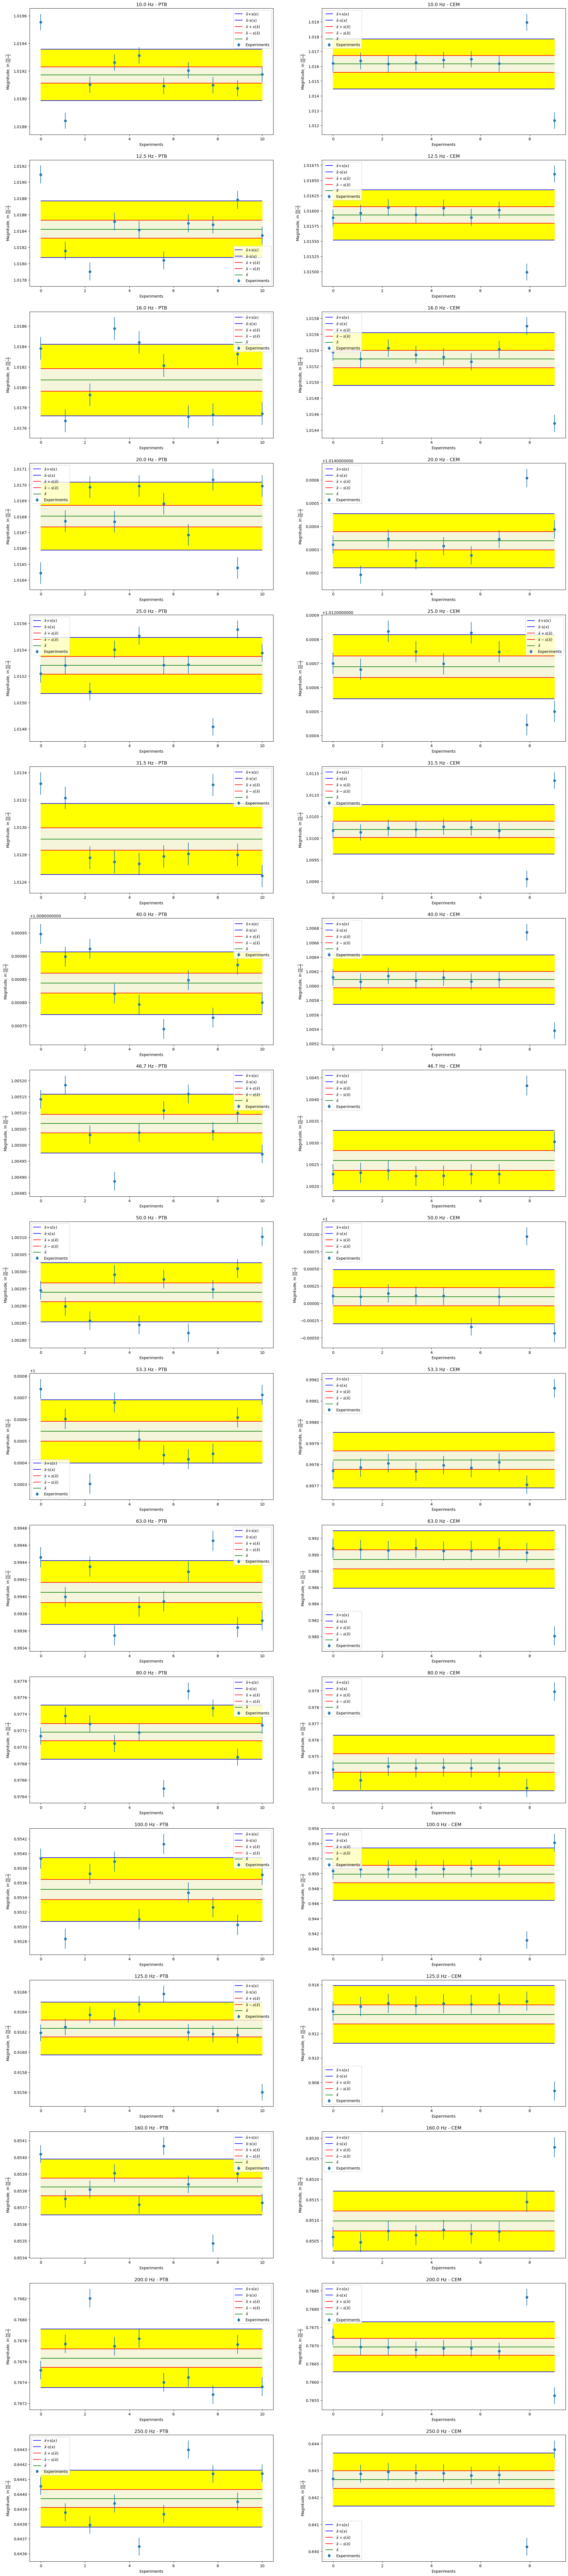

In [23]:
plot_Magnitude(PTB_separated_by_freq,avg_std_PTB,st_sample_PTB,CEM_separated_by_freq_new,avg_std_CEM,st_sample_CEM)

In [24]:
def plot_phase(dataset,mean_stdev,est_stdev,dataset1,mean_stdev1,est_stdev1):
    fig, ax = plt.subplots(nrows=len(dataset),ncols=2,figsize=(18,120))
    for i,val in enumerate(dataset.values()):
        
        x=np.linspace(0,len(val),len(val))
        y= np.rad2deg(val[r"$x_{\phi},$ [rad]"].values)
        error=est_stdev[est_stdev["Frequency [Hz]"]==val["Frequency [Hz]"].values[0]]
        y1=np.rad2deg(mean_stdev[r"$\bar{x}_{\phi},$ [rad]"][i]+mean_stdev[r"$s(x_{\phi}),$ [rad]"][i])
        y2=np.rad2deg(mean_stdev[r"$\bar{x}_{\phi},$ [rad]"][i]-mean_stdev[r"$s(x_{\phi}),$ [rad]"][i])
        y3=np.rad2deg(mean_stdev[r"$\bar{x}_{\phi},$ [rad]"][i]+est_stdev[r"$s(\bar{x}_{\phi}),$ [rad]"][i])
        y4=np.rad2deg(mean_stdev[r"$\bar{x}_{\phi},$ [rad]"][i]-est_stdev[r"$s(\bar{x}_{\phi}),$ [rad]"][i])
        y5=np.rad2deg(mean_stdev[r"$\bar{x}_{\phi},$ [rad]"][i])
        ax[i,0].errorbar(x, y,yerr=np.ones(len(val))*np.rad2deg(error[r"$s(\bar{x}_{\phi}),$ [rad]"].values), linestyle="",marker="o",label="Experiments")
        ax[i,0].hlines(y=y1,xmin=x[0],xmax=x[-1], color="blue", label=r"$\bar{x}$+s(x)")
        ax[i,0].hlines(y=y2,xmin=x[0],xmax=x[-1], color="blue", label=r"$\bar{x}$-s(x)")
        ax[i,0].hlines(y=y3,xmin=x[0],xmax=x[-1], color="red", label=r"$\bar{x}+s(\bar{x})$")
        ax[i,0].hlines(y=y4,xmin=x[0],xmax=x[-1], color="red", label=r"$\bar{x}-s(\bar{x})$")
        ax[i,0].hlines(y=y5,xmin=x[0],xmax=x[-1], color="green", label=r"$\bar{x}$")
        ax[i,0].set_title(str(val["Frequency [Hz]"].values[0])+" Hz - PTB")
        ax[i,0].set_ylabel(r"Phase in$^\circ$")
        ax[i,0].set_xlabel("Experiments")
        ax[i,0].legend(loc="best")
        ax[i,0].fill_between(x,y1,y2,color="yellow")
        ax[i,0].fill_between(x,y3,y4,color="beige")
       
    for i,val in enumerate(dataset1.values()):  
        x=np.linspace(0,len(val),len(val))
        y= np.rad2deg(val[r"$x_{\phi},$ [rad]"].values)
        error=est_stdev1[est_stdev1["Frequency [Hz]"]==val["Frequency [Hz]"].values[0]]
        y1=np.rad2deg(mean_stdev1[r"$\bar{x}_{\phi},$ [rad]"][i]+mean_stdev1[r"$s(x_{\phi}),$ [rad]"][i])
        y2=np.rad2deg(mean_stdev1[r"$\bar{x}_{\phi},$ [rad]"][i]-mean_stdev1[r"$s(x_{\phi}),$ [rad]"][i])
        y3=np.rad2deg(mean_stdev1[r"$\bar{x}_{\phi},$ [rad]"][i]+est_stdev1[r"$s(\bar{x}_{\phi}),$ [rad]"][i])
        y4=np.rad2deg(mean_stdev1[r"$\bar{x}_{\phi},$ [rad]"][i]-est_stdev1[r"$s(\bar{x}_{\phi}),$ [rad]"][i])
        y5=np.rad2deg(mean_stdev1[r"$\bar{x}_{\phi},$ [rad]"][i])
        ax[i,1].errorbar(x, y,yerr=np.ones(len(val))*np.rad2deg(error[r"$s(\bar{x}_{\phi}),$ [rad]"].values), linestyle="",marker="o",label="Experiments")
        ax[i,1].hlines(y=y1,xmin=x[0],xmax=x[-1], color="blue", label=r"$\bar{x}$+s(x)")
        ax[i,1].hlines(y=y2,xmin=x[0],xmax=x[-1], color="blue", label=r"$\bar{x}$-s(x)")
        ax[i,1].hlines(y=y3,xmin=x[0],xmax=x[-1], color="red", label=r"$\bar{x}+s(\bar{x})$")
        ax[i,1].hlines(y=y4,xmin=x[0],xmax=x[-1], color="red", label=r"$\bar{x}-s(\bar{x})$")
        ax[i,1].hlines(y=y5,xmin=x[0],xmax=x[-1], color="green", label=r"$\bar{x}$")
        ax[i,1].set_title(str(val["Frequency [Hz]"].values[0])+" Hz - CEM")
        ax[i,1].set_ylabel(r"Phase in$^\circ$")
        ax[i,1].set_xlabel("Experiments")
        ax[i,1].legend(loc="best")
        ax[i,1].fill_between(x,y1,y2,color="yellow")
        ax[i,1].fill_between(x,y3,y4,color="beige")
    plt.show()

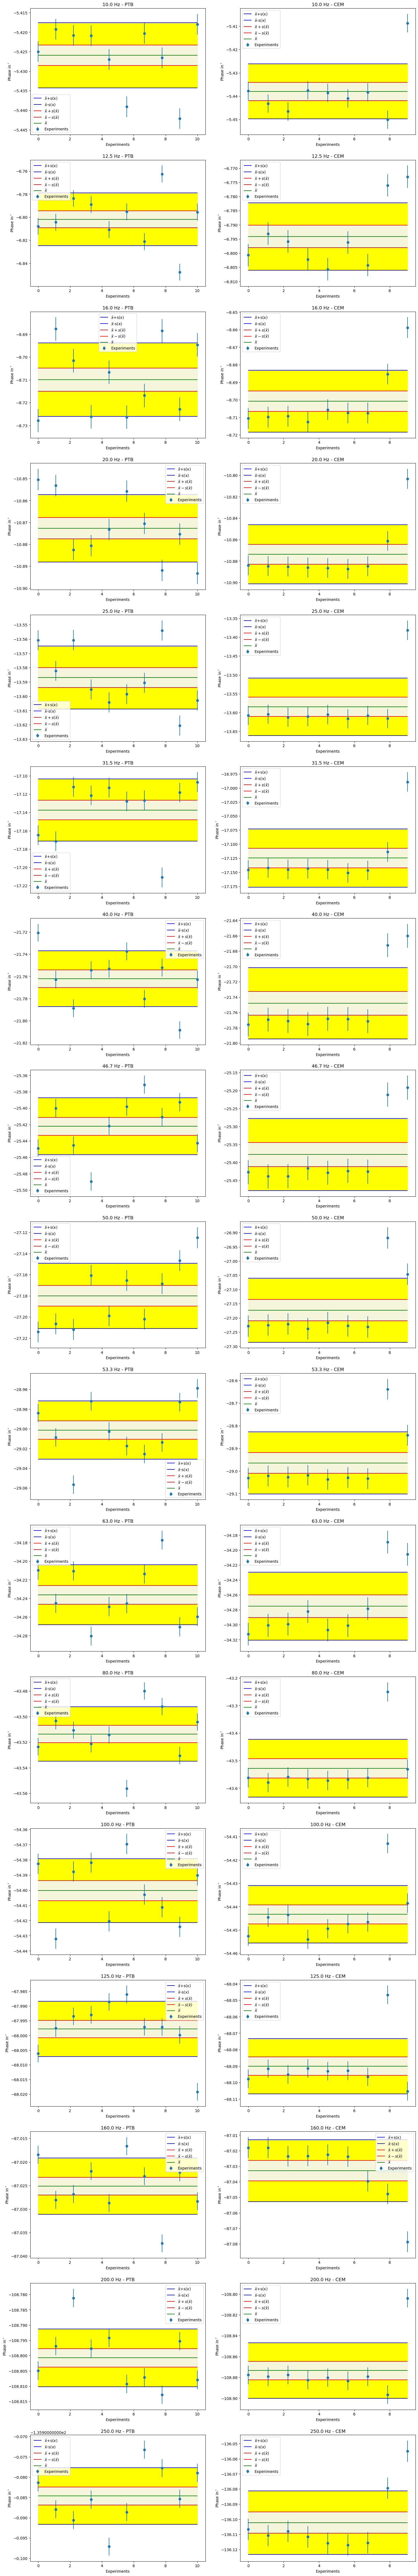

In [25]:
plot_phase(PTB_separated_by_freq,avg_std_PTB,st_sample_PTB,CEM_separated_by_freq_new,avg_std_CEM,st_sample_CEM)

## 3.2 En values

The method for assessment of agreement of the interlaboratory results is based on the En values.  En values for magnitude and phase have been calculated according to the given formula:
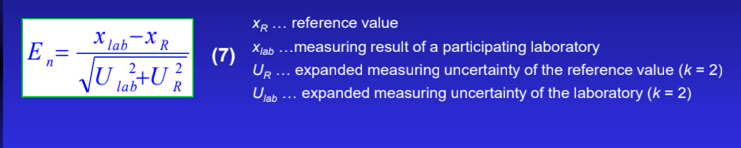

<br>$x_{lab}$ corresponds to the mean value at a specific frequency for the participating laboratory and
<br>$x_{ref}$ corresponds to the mean value at a specific frequency for the reference laboratory 
<br>$U_{lab}$ corresponds to the expanded measurement uncertainty of the mean value at a specific frequency for the participating laboratory 
<br>$U_{ref}$ corresponds to the expanded measurement uncertainty of the mean value at a specific frequency for the reference laboratory 
<br>Note that expanded measurement uncertainty used in this calculation contains only type A information.  The following criteria has been considered for the further conclusions:  
<br> If |En|<=1.1 - the criteria is satisfied (the original condition is that |En|<=1.0. However, because of the practical reasons, this limit is sometimes enlarged for 10%).
<br>If |En|>1.1 - the criteria is not satisfied.
<br>One of the laboratories has been selected as a reference laboratory and other asa participating laboratory.  This sequence is not important because it affects only the sign.That is why absolute values are considered.


The estimated value of the standard uncertainty is given by the standard deviation
of the mean

$$u(x)= s(\bar {x})$$

The expanded measurement uncertainty is calculated as:

$$U(x)= 2*u(x)$$


In [26]:
#1
def calculate_En_values(df1,df2,df3,df4):
    En_values=np.empty((len(df1),2))

    En_values[:,0]=np.abs(((df1.iloc[:,1]-df2.iloc[:,1])/(2*(np.sqrt(df3.iloc[:,1]**2 +df4.iloc[:,1]**2)))))
    En_values[:,1]=np.abs(((df1.iloc[:,3]-df2.iloc[:,3])/(2*(np.sqrt(df3.iloc[:,3]**2 +df4.iloc[:,3]**2)))))
    #En_values[:,2]=np.abs(((df1.iloc[:,6]-df2.iloc[:,6])/(2*(np.sqrt(df3.iloc[:,6]**2 +df4.iloc[:,6]**2))))) 
    return En_values 

In [27]:
En_values=calculate_En_values(avg_std_PTB,avg_std_CEM,st_sample_PTB,st_sample_CEM)

In [28]:
En_values_df=pd.DataFrame(En_values, columns=["Magnitude","Phase"])#"Excitation amplitude")

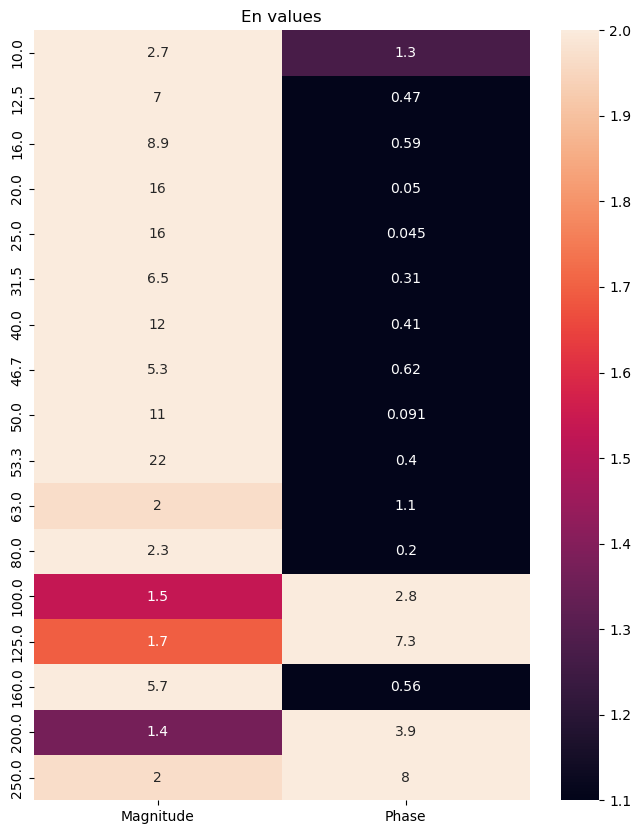

In [31]:
plt.figure(figsize=(8,10))
sns.heatmap(En_values_df, vmax=2, vmin=1.1,annot=True,yticklabels=PTB_separated_by_freq.keys(),xticklabels=["Magnitude","Phase"] )
plt.title("En values")
plt.show()


#excitation amp  - the en values does not have to be agreed because it is not targeted precisely

The calculated En values show disagreement of magnitudes at all frequencies, while good agreement of phase values is present in a range (12.5 - 80.0) Hz. Nevertheless,this approach is questionable when the test of variances is considered (2_ANOVA_for_experiments.ipynb)

# References

[1] https://www.investopedia.com/terms/c/coefficientofvariation.asp
<br>[2] https://en.wikipedia.org/wiki/Weighted_arithmetic_mean
<br>[3] https://en.wikipedia.org/wiki/Effective_sample_size
<br>[4] https://online.stat.psu.edu/stat500/lesson/10/10.2/10.2.1
<br>[5] https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/